# Machine Learning in Python - Project 1

Due Friday, March 11th by 5 pm.

Contributors: Ershang Xing(s2168664), Yueyan Liu(s2174448), Meng Li(s2185836), Xuran Yan(s2187336). 

## 0. Setup

In [1]:
pip install schrutepy

     |████████████████████████████████| 5.4 MB 3.9 MB/s 
     |████████████████████████████████| 793 kB 41.7 MB/s 
     |████████████████████████████████| 380 kB 41.2 MB/s 
     |████████████████████████████████| 138 kB 42.6 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 54 kB 1.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 3.6 MB 23.3 MB/s 
  Created wheel for schrutepy: filename=schrutepy-0.1.3-py3-none-any.whl size=3492 sha256=e0aa1e4e1293960d64033b7844e20a199556e5090e58de9943b90319cda931cd
  Stored in directory: /root/.cache/pip/wheels/a2/9c/66/dd742444de1036201b0cc1038a134a71b36f966af8db123444
Successfully built schrutepy
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninsta

In [2]:
pip install pyecharts

     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 130 kB 36.1 MB/s 


In [3]:
pip install plotly_express

In [4]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np
from datetime import datetime
import json
import snowballstemmer
import xml.dom.minidom as xmldom
import math 

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from pyecharts import options as opts
from pyecharts.charts import Graph
from pandas.plotting import parallel_coordinates
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80
%matplotlib inline

# sklearn modules
import sklearn
from sklearn import datasets 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline

from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error, make_scorer


from lightgbm import LGBMRegressor
from collections import Counter
from schrutepy import schrutepy
from tqdm import tqdm
from random import shuffle


import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/My Drive/MLP Proj1')
!ls

Mounted at /content/drive
 basic_wordcloud.html		   project1111.ipynb
 cast_df.csv			   project_1_code.ipynb
'Copy of project1_group_4.ipynb'   project1_group_4.ipynb
 director_df.csv		   render.html
 EpisodeInfo_df.csv		   StopWords_EN.txt
 movie_df.csv			   the_office.csv


In [6]:
# Load data
data = pd.read_csv("the_office.csv")
df = schrutepy.load_schrute()

# Load extra datasets from github
url = 'https://raw.githubusercontent.com/s2187336/mlp-project1/main/director_df.csv'
director = pd.read_csv(url,parse_dates=[0])
url = 'https://raw.githubusercontent.com/s2187336/mlp-project1/main/movie_df.csv'
movie = pd.read_csv(url,parse_dates=[0])
url = 'https://raw.githubusercontent.com/s2187336/mlp-project1/main/cast_df.csv'
cast = pd.read_csv(url,parse_dates=[0])
url = 'https://raw.githubusercontent.com/s2187336/mlp-project1/main/EpisodeInfo_df.csv'
EpisodeInfo = pd.read_csv(url,parse_dates=[0])
url = 'https://raw.githubusercontent.com/s2187336/mlp-project1/main/StopWords_EN.txt'
StopWords_EN = pd.read_fwf(url,index_col=0,parse_dates=[0],header=None).index.tolist()

In [7]:
display.Image("./NBC_Universal.png")

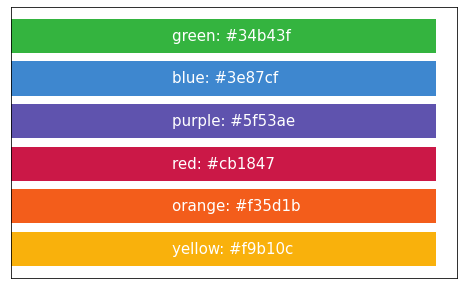

In [8]:
## Main colors
colors = {'yellow':  '#f9b10c',
          'orange':  '#f35d1b',
          'red':     '#cb1847',
          'purple':  '#5f53ae',
          'blue':    '#3e87cf',
          'green':   '#34b43f'}

plt.figure(figsize = (8,5))
plt.barh(range(6),[1]*6, color = colors.values())
plt.xticks([])
plt.yticks([])
for i in range(6):
    plt.text(0.38,i-0.1, list(colors.keys())[i]+': '+ list(colors.values())[i],color = 'white', fontsize = 15)
plt.show()

## 1. Introduction

### 1.1 Task

"The Office" is an American sitcom documentary that aired on NBC for nine seasons from March 2005 to May 2013.The purpose of this project is to build an accurate and reliable predictive model to advise on the production of the highest rated reunion episode of The Office. Specifically, by capturing potential relationships between ratings and other features in The Office's data, the analysis gives reasons why some episodes are more popular than others.

### 1.2 Data
***the_office.csv*** : The data set contains the relevant content of the 186 episodes of The Office. The included columns in the data set are as follows:

* `season` - Season number of the episode
* `episode` - Episode number within a season
* `episode_name` - Episode name
* `director` - Episode director(s), names are separated by
* `writer` - Episode writer(s), names are separated by 
* `imdb_rating` - Episode rating on IMDB
* `total_votes` - Number of ratings for episode on IMDB
* `air_date` - Original air date of episode
* `n_lines` - Number of spoken lines in episode
* `n_directions` - Number of lines containing a stage direction
* `n_words` - Number of dialog words in episide
* `n_speak_char` - Number of different characters with spoken lines in episode
* `main_chars` - Main characters appearing in episode (main characters were determined to be characters appearing in more than 1/2 of the episodes)

Here are the four additional datasets added: 

***EpisodeInfo_df.csv*** : In order to explore whether the theme of each episode is a factor affecting the ratings, we sorted out the story lines and keywords of each episode and merged them into the dataset "EpisodeInfo". The dataset includes the storyline of each episode, the ratings and the number of people who rated each episode by gender and groups of four age groups < 18, 18-29, 30-44, 45+. 

***director_df.csv*** : Since the directors of each episode are different, in order to explore whether the different styles and abilities of the directors have an impact on the ratings, we have sorted out the biographies and other works of 55 directors in the episode and merged them into the dataset "director". 

***cast_df.csv*** : Actors' popularity is one of the factors that affects ratings, so we've compiled the biographies of the series' 17 starrings and other works they've been involved in. 

***Movie_df.csv*** : In order to quantify the features of the above-mentioned directors and starrings, we have compiled relevant data on other works of directors and starrings. This dataset contains ratings, comment counts, genres, storylines, and keywords of other works performed by starrings and directors.

We use web crawler to collect external data on the IMDB website and organize them into sets, and then import them from GitHub through pandas. The following is the GitHub link, which contains external data and codes: https://github.com/s2187336/mlp-project1.git

### 1.3 Approach & Conclusion

In this paper, onehot is used to convert categorical variables into numerical variables, TF-IDF is used to process lines, and PCA is used to reduce dimensionality to extract keywords.

By comparing the values of RMSE, MSE and R_square of the four models of linear regression, SVM Regressor, random forest, and LGBM Regressor, it is finally concluded that random forest is the model with the best fitting effect.

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

## 2.1 Numerical features


#### **Inspecting Data**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        186 non-null    int64  
 1   episode       186 non-null    int64  
 2   episode_name  186 non-null    object 
 3   director      186 non-null    object 
 4   writer        186 non-null    object 
 5   imdb_rating   186 non-null    float64
 6   total_votes   186 non-null    int64  
 7   air_date      186 non-null    object 
 8   n_lines       186 non-null    int64  
 9   n_directions  186 non-null    int64  
 10  n_words       186 non-null    int64  
 11  n_speak_char  186 non-null    int64  
 12  main_chars    186 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


After inspecting the data, we found that there are 13 columns and 186 rows in total. Each of these rows represents an episode of the series, so we need to create an episode number before performing the EDA so that it can be easily referenced without confusion. 

Next we normalize the ratings of the Office series (so that it falls between 0 and 1) by the formula: (rating - minimum rating) / (maximum rating - minimum rating). 

Then color is added to each rating for visualization, and the assignment rules are as follows:

* Episodes with ratings < 0.25 will appear in red
* Episodes with ratings from 0.25 to 0.49 will appear in orange
* Episodes with ratings from 0.50 to 0.74 will appear in yellow
* Episodes with ratings from 0.75 to 1.00 will appear in green

In [10]:
# create episode number
ep_no = []
for i, row in data.iterrows() :
    ep_no.append(i+1)
data['episode_no'] = ep_no

# normalize the ratings
max_rating = max(data['imdb_rating'])
min_rating = min(data['imdb_rating'])
normalized_imdb_rating = (data['imdb_rating'] - min_rating) / (max_rating - min_rating)
data['norm_imdb_rating'] = normalized_imdb_rating

# add color to each rating
imdb_rating_color = []
for lab, row in data.iterrows() :
    if row['norm_imdb_rating'] < 0.25:
        imdb_rating_color.append('red')
    elif row['norm_imdb_rating'] < 0.5:
        imdb_rating_color.append('orange')
    elif row['norm_imdb_rating'] < 0.75:
        imdb_rating_color.append('yellow')
    else :
        imdb_rating_color.append('green')
data['colors'] = imdb_rating_color
data.head()

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars,episode_no,norm_imdb_rating,colors
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...,1,0.300000,orange
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...,2,0.533333,yellow
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,3,0.400000,orange
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,4,0.466667,orange
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...,5,0.566667,yellow


#### **Data Visualization**

We begin by constructing a pairs plot of our data and find out that total_votes and imdb_rating asapear as well season and imdb_rating to exibit linear relationship. 

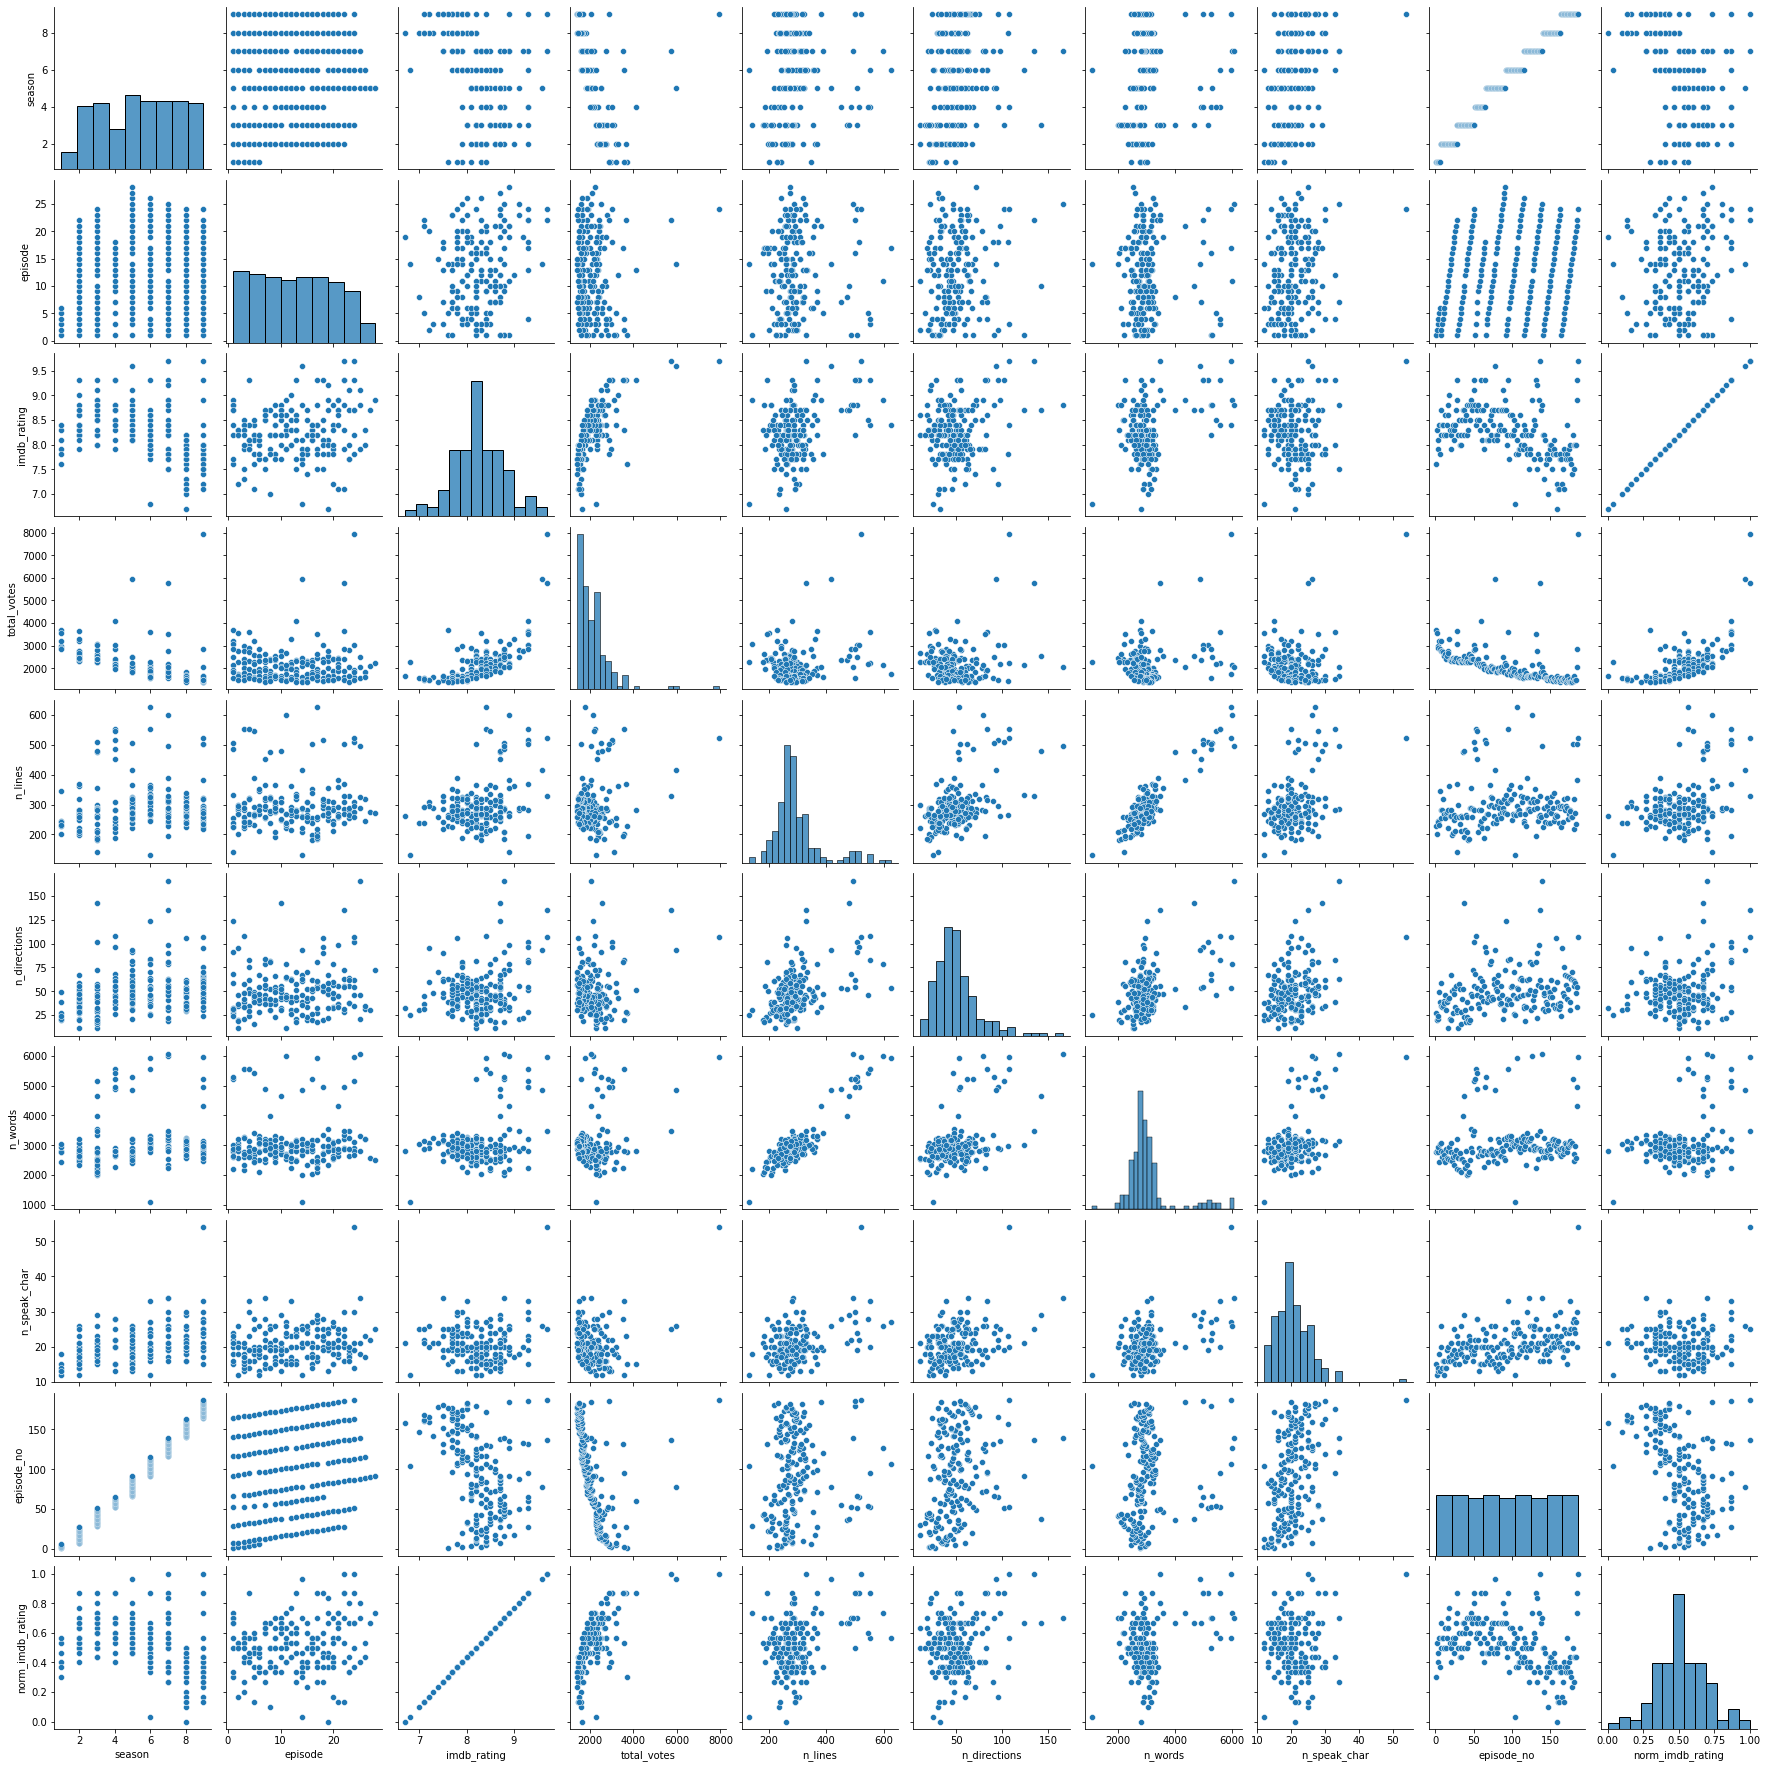

In [11]:
sns.pairplot(data); 

To be more specific, from the correlation heatmap below, we can clearly see that imdb_rating has a strong positive correlation with total_votes, followed by n_lines, while season has a negative correlation with imdb_rating.

In addition, n_lines and n_words are highly correlated, which seems unsurprising, since the more lines, the more words. When we start feature engineering, we may only want to keep one of the features to reduce multicollinearity or combine them into a new feature.

Furthermore, there is a positive correlation between n_directions, n_speak_char and n_lines, which can be interpreted as the more characters speak, the more words, the more stage directions are contained. There is also a positive correlation between these three groups of data and ratings. Therefore, the analysis of lines is one of the main contents we will study.

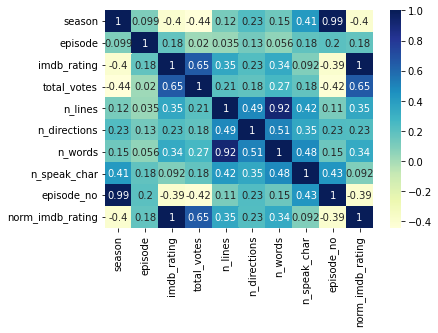

In [12]:
sns.heatmap(data.corr(),annot=True, cmap = 'YlGnBu');

#### **Seasonal trend**

Then we use the line chart, bar chart and scatter chart to visualize the relationship among ratings, votes and seasons. Here is the explanation of this three figures:

*   As can be seen from Figure 1, the average rating of each season shows an inverted U-shape as a whole. The score of the first few seasons shows an upward trend, and then gradually declines. However, it picks up in the seventh and ninth seasons, but the eighth season has the lowest average rating.

*   It can be seen intuitively from Figure 2 and 3 that the number of votes showed a declining trend in general. The first season had the largest number of votes, which can be explained as this drama was introduced to the audience when it was released and attracted a lot of people to watch it. As the number of votes increased during the season, the number of votes gradually decreased and eventually stabilized between 1,500 and 2,000.

*   As can be seen from Figure 3, orange and yellow ratings are more common in the first to third quartile, and many red low ratings appear in the last quartile. In addition, the green ratings are evenly distributed in the chart, with the number of viewers spiking to 8,000 for the final episode, which can be explained by viewers paying more attention to the story content of the finale.

Text(0, 0.5, 'total_votes')

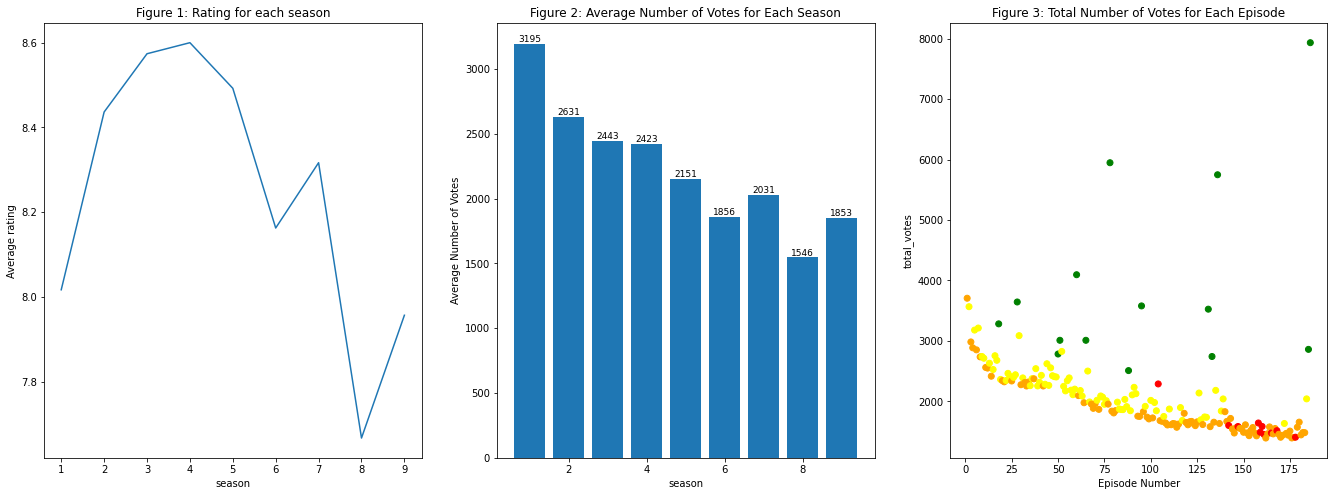

In [13]:
plt.rcParams['figure.figsize'] = (23, 8)
plt.subplots_adjust(wspace=0.2)
rats = pd.DataFrame(data.groupby(['season'])['imdb_rating','total_votes'].mean()).reset_index()

# Rating for each season
plt.subplot(131)
plt.plot(rats['season'], rats['imdb_rating'])
plt.title('Figure 1: Rating for each season'); plt.xlabel('season'); plt.ylabel('Average rating')

# Average Number of Votes for Each Season
plt.subplot(132)
plt.bar(rats['season'], rats['total_votes'])
plt.title('Figure 2: Average Number of Votes for Each Season'); plt.xlabel('season'); plt.ylabel('Average Number of Votes')
for a,b in zip(rats['season'],rats['total_votes']):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=9)

# Total Number of Votes for Each Episode
plt.subplot(133)
plt.scatter(data['episode_no'], data['total_votes'], color = data['colors'])
plt.title('Figure 3: Total Number of Votes for Each Episode'); plt.xlabel('Episode Number'); plt.ylabel('total_votes')


Next, we treat the release time as three variables of year, month, day, and then calculate the number, maximum, minimum, mean and variance of the corresponding ratings and votes for the directors, writers, and main characters, and add them as new features.

In [14]:
### the office numerical features
class statFeatures():

    def __init__(self):
        pass
        # self.attribute_names = attrNames

    def split_key(self, df, key):
        """
        key = 'director', 'writer' or 'main_chars'
        """
        df_key = df[key].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
        df_new = df.drop([key], axis=1).join(df_key.rename(key))
    
        return df_new
    
    def group_feature(self, df, key, target, aggs):
        agg_list = []
        for ag in aggs:
            agg_list.append((f'{key}_{target}_{ag}',ag))
        t = df.groupby(key)[target].agg(agg_list).reset_index()
        return t

    def extract_feature(self, df, key):
        df_stat = pd.DataFrame()
        df = self.split_key(df, key)
        df_stat = self.group_feature(df, key, 'imdb_rating', ['count','max', 'min', 'mean', 'std'])
        t = self.group_feature(df, key, 'total_votes', ['count','max', 'min', 'mean','std'])
        df_stat = pd.merge(df_stat, t, on=key, how='left')
        
        return df_stat

    def extract_dt(self, df):
        df_air_date = pd.DataFrame()

        df['air_date'] = df['air_date'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d'))
        df_air_date['year'] = df['air_date'].dt.year
        df_air_date['month'] = df['air_date'].dt.month
        df_air_date['day'] = df['air_date'].dt.day
        df_air_date['weekday'] = df['air_date'].dt.weekday
        return df_air_date

#     def fit(self, x, y=None):
#         return self

    def transform(self, x):
        df = x.copy()
        df['index'] = x.index
        
        x_flat = self.split_key(df, 'director')
        x_flat = self.split_key(x_flat, 'writer')
        x_flat = self.split_key(x_flat, 'main_chars')
        
        df_stat_director = self.extract_feature(df, 'director')
        df_stat_writer = self.extract_feature(df, 'writer')
        df_stat_chars = self.extract_feature(df, 'main_chars')
        
        x_stat = x_flat[['index', 'director', 'writer', 'main_chars']]
        x_stat = pd.merge(x_stat, df_stat_director, how = 'left', on = 'director')
        x_stat = pd.merge(x_stat, df_stat_writer, how = 'left', on = 'writer')
        x_stat = pd.merge(x_stat, df_stat_chars, how = 'left', on = 'main_chars')
        
        del x_stat['director']
        del x_stat['writer']
        del x_stat['main_chars']
        
        x_mean = x_stat.groupby('index', as_index = False).mean().reset_index()
        #x_max = x_stat.groupby('index', as_index = False).max().reset_index()
        #x_min = x_stat.groupby('index', as_index = False).min().reset_index()
        
#         x_mean.columns = [cn+'_mean' if cn != 'index' else cn for cn in x_mean.columns]
#         x_max.columns = [cn+'_max' if cn != 'index' else cn for cn in x_max.columns]
#         x_min.columns = [cn+'_min' if cn != 'index' else cn for cn in x_min.columns]
        
#         x = pd.merge(x, x_mean, how = 'left', on = 'index')
#         x = pd.merge(x, x_max, how = 'left', on = 'index')
#         x = pd.merge(x, x_min, how = 'left', on = 'index')
        
#         del x['index']
        del x_mean['level_0']
        del x_mean['index']
        x_mean = x_mean.fillna(0)


        numeric_features_names = ['season', 'episode', 'total_votes', 'n_lines', 'n_directions', 'n_words', 'n_speak_char']
        X = x[numeric_features_names]

        X = pd.merge(X, self.extract_dt(x), how = 'left', left_index = True, right_index = True)
        X = pd.merge(X, x_mean, how = 'left', left_index = True, right_index = True)

        return X
        
 
t_stat = statFeatures()
X_stat = t_stat.transform(x = data)
X_stat.head()

,season,episode,total_votes,n_lines,n_directions,n_words,n_speak_char,year,month,day,...,main_chars_imdb_rating_count,main_chars_imdb_rating_max,main_chars_imdb_rating_min,main_chars_imdb_rating_mean,main_chars_imdb_rating_std,main_chars_total_votes_count,main_chars_total_votes_max,main_chars_total_votes_min,main_chars_total_votes_mean,main_chars_total_votes_std
0,1,1,3706,229,27,2757,15,2005,3,24,...,167.400000,9.7,6.710000,8.271561,0.526997,167.400000,7934.0,1414.400000,2155.192679,804.068789
1,1,2,3566,203,20,2808,12,2005,3,29,...,159.909091,9.7,6.709091,8.276866,0.526762,159.909091,7934.0,1415.727273,2159.802929,808.643277
2,1,3,2983,244,21,2769,13,2005,4,5,...,164.000000,9.7,6.710000,8.269667,0.530306,164.000000,7934.0,1414.500000,2151.563107,808.526777
3,1,4,2886,243,24,2939,14,2005,4,12,...,159.416667,9.7,6.708333,8.267866,0.532259,159.416667,7934.0,1410.916667,2148.050232,811.445926
4,1,5,3179,230,49,2437,18,2005,4,19,...,161.727273,9.7,6.709091,8.261419,0.532360,161.727273,7934.0,1412.545455,2141.666072,815.218238


## 2.2 Categorical features

#### **Director**

As can be seen from the data set, the director of each episode is different, so the style of the episode and the way the story is presented will also be different. Since the director is the core creator of each episode's content, we wonder if the director can influence the ratings of each episode.

Below is a visualization of the number of episodes each director has directed(top 10) and the average rating earned (top 10). It can be seen that Randall Einhorn directed the most episodes, followed by Paul Feig and Greg Daniels. Moreover, Harold Ramis has the highest average rating of nearly 8.9 despite not having many episodes directed by him.

In [15]:
directedEpisodes = data['director'].value_counts().reset_index()
directedEpisodes.columns = ['director','Number of Episodes']
directedEpisodes = directedEpisodes[directedEpisodes['director'] != 'See full summary']

directorAvgRating = data.groupby('director')['imdb_rating'].mean().reset_index()
directorAvgRating = directorAvgRating[directorAvgRating['director'] != 'See full summary']
directorAvgRating = directorAvgRating.sort_values(by = 'imdb_rating',ascending = False)

fig = make_subplots(rows = 1, cols = 2,
                    subplot_titles=['Number of Episodes Directed', 'Average Rating of Episodes'], 
                   horizontal_spacing=0.2)

colors = ['#5cb3ce'] * 10
colors[0] = '#1c4d5d'

trace0 = go.Bar(
    x = directedEpisodes['Number of Episodes'][:10],
    y = directedEpisodes['director'][:10],
    orientation = 'h',
    name = 'Directors',
    marker_color = colors,
    opacity = 0.8,
    text = directedEpisodes['Number of Episodes'][:10],
    textposition='inside'
)

fig.add_trace(trace0, row = 1, col = 1)
fig.update_xaxes(title_text = 'Number of Episodes Directed', row = 1, col = 1)
fig.update_yaxes(title_text = 'Director Name', row = 1, col = 1)

colors = ['#ff2d4c']*10
colors[0] = '#ca001e'

trace1 = go.Bar(
    x = directorAvgRating['imdb_rating'][:10],
    y = directorAvgRating['director'][:10],
    orientation = 'h',
    name = 'Ratings',
    marker_color = colors,
    opacity = 0.8,
    text = directorAvgRating['imdb_rating'][:10],
    textposition = 'inside'
)

fig.add_trace(trace1, row = 1, col = 2)
fig.update_xaxes(title_text = 'Average Rating', row = 1, col = 2)
fig.update_yaxes(title_text = 'Director Name', row = 1, col = 2)

fig.update_layout(
    showlegend = False,
    font=dict(
        family="Fira Code",
        size=10,
    )
)
fig.show()

As you can see from the boxplot below of the ratings for all episodes each director has directed, there are some directors whose ratings vary widely, such as Craig Zisk, Jennifer Serota. Therefore, we will add the max, min, mean and variance of each director's ratings as new features.

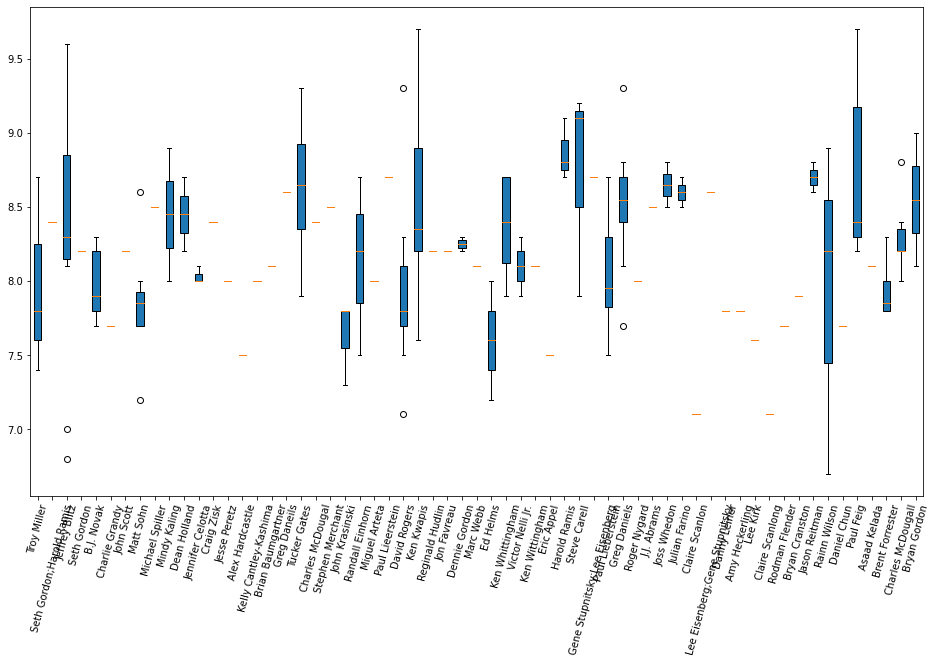

In [16]:
plt.figure(figsize=(16,9))
all_data=[data[data['director'] == d]['imdb_rating'] for d in set(data['director'])]
plt.xticks(rotation=75)
plt.boxplot(all_data,patch_artist=True, labels=set(data['director'])) 
plt.show()

To further explore the influence of a director on ratings, we consider the following questions: 
* whether the director is good at directing comedy
* whether the director's other works are popular (i.e., have high ratings)
* whether the director is well known to the public

So we introduced external data "director_df" and "movie_df", including data about each director's biography and other works he directed.

#### **Main Characters**

The following figure shows the relationship between characters in episodes. The size of the circle represents the number of lines, and the number indicated by the color represents the season in which the character appears. It is not difficult to see that Michael, Dwight, Jim, Pam and Andy interact with other characters the most and have the most lines. Same treatment as director variables, we need to add the max, min, mean and variance of each main character's ratings as new features.

In [17]:
main_chars = list(set([y for x in list(data['main_chars'].apply(lambda x : x.split(';'))) for y in x]))

def firstComeSeason(char):
    return min(df[df['character']== char]['season'])

top_chars_nums = 50
symbolSize_adjust = 20
min_lines = 0.05

cha_dict = dict(Counter(df['character']))
top_chars = sorted(cha_dict.items(),key=lambda x:x[1],reverse=True)[:top_chars_nums]
char_names = [x[0] for x in top_chars]
char_lines = [x[1] for x in top_chars]
symbolSize = [symbolSize_adjust+80*(x-min(char_lines))/(max(char_lines) - min(char_lines)) for x in char_lines]

is_main_char = []
for i in char_names:
  is_main_char.append(0 if i in main_chars else 1)

nodes = []
for i in range(len(char_names)):
  nodes.append({"id":str(i), "name":char_names[i], "symbolSize": symbolSize[i], "value":char_lines[i], "category": str(firstComeSeason(char_names[i]))})

links = {}
top_df = df[df['character'].isin(char_names)]
for i in range(len(top_df)):
  if i != len(top_df)-1:
    source = char_names.index(top_df['character'].iloc[i])
    target = char_names.index(top_df['character'].iloc[i+1])
    link = {"source":source, "target":target}
    if str(link) not in list(links.keys()):
        links[str(link)] = 1
    else:
        links[str(link)] += 1
links = [eval(k) for k,v in links.items() if v >= 10+char_lines[eval(k)["source"]]*min_lines]


c = Graph(init_opts=opts.InitOpts(width="1000px", height="600px"))
c.add(
        "",
        nodes=nodes,
        links=links,
        categories=[{"name":str(i)} for i in range(1,10)],
        layout="circular",
        is_rotate_label=True,
        linestyle_opts=opts.LineStyleOpts(color="source", curve=0.3),
        label_opts=opts.LabelOpts(position="right"),
    )
c.set_global_opts(
        title_opts=opts.TitleOpts(title="Graph-Les Miserables"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_left="2%", pos_top="20%"),
    )

c.render_notebook()
c.render()
from IPython.core.display import display, HTML
HTML(filename='render.html')

To further explore the influence of an actor on ratings, we consider the following questions: 
* which roles have a significant impact on ratings
* whether the actor is good at acting in comedy
* whether the actor's other works are popular (i.e., have high ratings )
* whether the actor is well known to the public


So we introduced external data "cast_df" and "movie_df", including data about each actor's biography and other works he participated in. 

### **One hot encoding**

Before processing the external data, we use one-hot encoding to convert the three sets of categorical variables of director, writer and main character into numerical values as features.

In [18]:
## one-hot transform
class oneHotFeature():
  def __init__(self):
      pass

  def oneHotTrans(self, feature):
      if type(feature.iloc[1])== str:
        feature = feature.apply(lambda x : np.array(x.split(';')))
      
      # train ont-hot
      all_chars = []
      for i in feature:
          all_chars.extend(i)
      all_chars = np.array(list(set(all_chars)))
      
      onehot_encoder = OneHotEncoder(sparse = False)
      char_encoder = onehot_encoder.fit(all_chars.reshape(-1,1))
      
      # apply one-hot
      all_features = []
      for i in feature:
          features = np.zeros((1,len(all_chars)))
          for j in i:
              features += char_encoder.transform(j.reshape(-1,1))
          all_features.append(features)
      all_features = np.array(all_features).reshape(len(feature),-1)
      feature_index = list(onehot_encoder.categories_[0])
      feature_index = [feature.name + '_' + x for x in feature_index]
      
      return pd.DataFrame(all_features, columns = feature_index)
    

  def office_transform(self, data):
    main_chars = self.oneHotTrans(data['main_chars'])
    director = self.oneHotTrans(data['director'])
    writer = self.oneHotTrans(data['writer'])

    X = pd.merge(main_chars, director, how = 'left', left_index = True, right_index = True)
    X = pd.merge(X, writer, how = 'left', left_index = True, right_index = True)

    return X

t_oh = oneHotFeature()
X_chars = t_oh.office_transform(data)
X_chars.head()

,main_chars_Andy,main_chars_Angela,main_chars_Creed,main_chars_Darryl,main_chars_Dwight,main_chars_Erin,main_chars_Jim,main_chars_Kelly,main_chars_Kevin,main_chars_Meredith,...,writer_Paul Lieberstein,writer_Peter Ocko,writer_Ricky Gervais,writer_Robert Padnick,writer_Ryan Koh,writer_Stephen Merchant,writer_Steve Carell,writer_Steve Hely,writer_Tim McAuliffe,writer_Warren Lieberstein
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.3 IMDB features

**Preprocessing Movie dataset** 

We are using additional data on the directors, the cast and the movies to get more interesting features regarding directors and the cast. Before we access movie data set, we noticed that some numeric values are stored as string with characters 'k' and 'm' for thousands and millions. We transformed all columns to the expected type and drop duplicate movies. 

The dataframe 'director' contains relavent information of directors who has participated in the produciton of episodes in The Office. We join the director table and movie table on the directors' movies and TV series. Then we compute the number of commedies and the weighted average rating of each director's past work as new features. In addition, text information, like story lines and keywords are kept for later processing. Similarly, for the list of movies in which the cast has played an role in, we find the weighted average rating and count the number of commedies. Text information is kept for processing. 

In [19]:
### IMDB features
class IMDB_feature():
  def __init__(self, episode_info_df, director_df, main_char_df, movie_df, data):
    self.episode_info_df = episode_info_df.copy()
    self.director_df = director_df.copy()
    self.main_char_df = main_char_df.copy()
    self.movie_df = movie_df.copy()
    self.data = data.copy()
    self.t_oh = oneHotFeature()
  
  def preprocessing_movie(self, movie):
    # drop duplicates
    movie =  movie.drop_duplicates(['name'],ignore_index=True)
    # str -> float
    # k -> 1000, m -> 1000000
    for c in ['total_votes', 'user_reviews']:
        indices_k = movie[c].str.contains('K', na = False)
        indices_m = movie[c].str.contains('M', na = False)
        movie[c] = movie[c].str.replace('K', '')
        movie[c] = movie[c].str.replace('M', '')
        movie[c][indices_k] = movie[indices_k][c].astype(float).apply(lambda x : x * 10**3)
        movie[c][indices_m] = movie[indices_m][c].astype(float).apply(lambda x : x * 10**6)
      
    return movie

    # helper that calcualtes average rating
  def wa(self, x):
      a = x[:,0]
      w = x[:,1]
      return np.ma.average(a, weights=w)

  # helper that count number of comedy
  def countComedy(self, x):
      if x==x:
          d = dict(Counter(x.split(';')))
          if 'Comedy' in d.keys():
              return d['Comedy']
      return 0

  def preprocessing_dir(self):

    data = self.data
    director = self.director_df
    movie = self.preprocessing_movie(self.movie_df)

    # list of films 
    director['Filmography'] = director['Filmography'].str.split(';')

    dir_movie = pd.merge(director.explode('Filmography'), movie, left_on = 'Filmography', right_on = 'name', how='inner')
    dir_movie = dir_movie.rename(columns={'name_x':'dir_name', 'name_y': 'movie_name'})  # rename columns 
    
    # average rating
    dir_rating = dir_movie.groupby('dir_name').apply(lambda x : self.wa(x[['rating', 'total_votes']].astype(float).dropna().values))
    dir_rating = dir_rating.fillna(dir_rating.mean())
    dir_rating = pd.DataFrame({'name': dir_rating.index, 'dir_rating': dir_rating.values})
    director = pd.merge(left=director, right=dir_rating, left_on='name', right_on='name')
    
    # tags
    dir_tags = dir_movie.groupby('dir_name').apply(lambda x : x.tags.str.cat(sep = ';'))

    director= pd.merge(left=director, right=pd.DataFrame({'name': dir_tags.index, 'dir_tags': dir_tags.values}), left_on='name', right_on='name',how = 'left')
    director['dir_comedy'] = director['dir_tags'].apply(self.countComedy)
 
    # story line
    dir_story_line = dir_movie.groupby('dir_name').apply(lambda x : x.storyLine.str.cat(sep = ' '))
    director= pd.merge(left=director, right=pd.DataFrame({'name': dir_story_line.index, 'dir_story_line': dir_story_line.values}), left_on='name', right_on='name')

    # keywords
    dir_keywords = dir_movie.groupby('dir_name').apply(lambda x : x.keyWords.str.cat(sep = ''))
    director= pd.merge(left=director, right=pd.DataFrame({'name': dir_keywords.index, 'dir_keywords': dir_keywords.values}), left_on='name', right_on='name')

    director['dir_rating'] = director['dir_rating'].fillna(director['dir_rating'].mean())
    director = director.drop(['born_year', 'dir_tags'], axis = 1)

    director = pd.merge(left = data['director'], right = director, left_on = 'director', right_on = 'name',how = 'left')
    if 'Unnamed: 0' in list(director.columns):
      del director['Unnamed: 0']
    del director['name']
    del director['director']
    del director['Filmography']
    return director


  def preprocessing_cast(self):
    data = self.data
    cast = self.main_char_df
    movie = self.preprocessing_movie(self.movie_df)

    # cast info
    cast_aux = cast.copy() # keep a copy of cast data
    cast.Filmography = cast.Filmography.apply(lambda x: x.split(';'))
    cast = cast.explode('Filmography')
    cast_movie = pd.merge(cast, movie, left_on='Filmography', right_on='name')

    # weighted average rating
    cast_rating = cast_movie.groupby('chars').apply(lambda x : self.wa(x[['rating', 'total_votes']].astype(float).dropna().values))
    
    cast_movie['total_votes'] = cast_movie['total_votes'].fillna(0).astype('int')
    cast_total_votes_sum = cast_movie.groupby('chars').sum()['total_votes']
    cast_total_votes_mean = cast_movie.groupby('chars').mean()['total_votes']
    # comedy
    cast_tags = cast_movie.groupby('chars').apply(lambda x : x.tags.str.cat(sep = ';'))
    cast_tags = cast_tags.apply(self.countComedy)
    cast_f = pd.DataFrame({
      'cast_rating': cast_rating,
      'cast_comedy': cast_tags,
      'cast_total_votes_sum': cast_total_votes_sum,
      'cast_total_votes_mean': cast_total_votes_mean
      })
    cast_f = cast_f.reset_index()
    cast_f = pd.merge(cast_f, cast_aux[['chars', 'bio']], on='chars')

    # cast feature in episode
    data_cast = data[['main_chars', 'episode_name']]
    data_cast['main_chars']  = data_cast['main_chars'].str.split(';')
    data_cast = data_cast.explode('main_chars')
    data_cast = pd.merge(data_cast, cast_f, left_on='main_chars', right_on='chars')
    cast_feature = pd.DataFrame()
    # cast_rating
    cast_feature['cast_rating'] = data_cast.groupby('episode_name').apply(lambda x: np.mean(x.cast_rating))
    # total votes
    cast_feature['cast_total_votes_sum'] = data_cast.groupby('episode_name').apply(lambda x: np.mean(x.cast_total_votes_sum))
    cast_feature['cast_total_votes_mean'] = data_cast.groupby('episode_name').apply(lambda x: np.mean(x.cast_total_votes_mean))
    # cast_comedy
    cast_feature['cast_comedy'] = data_cast.groupby('episode_name').apply(lambda x: np.mean(x.cast_comedy))
    # cast bio
    cast_feature['cast_bio'] = data_cast.groupby('episode_name').apply(lambda x: x.bio.str.cat(sep = ' '))

    cast_feature = cast_feature.reset_index()
    del cast_feature['episode_name']
    return cast_feature

  def episodeInfo_train(self):
    EpisodeInfo = self.episode_info_df.copy()
    EpisodeInfo['keyWords'] = EpisodeInfo['keyWords'].apply(lambda x: np.array(eval(x)))

    keyWords_df = self.t_oh.oneHotTrans(EpisodeInfo['keyWords'])
    return keyWords_df
  
  def numeric_processing(self):
    EpisodeInfo = self.episode_info_df
    num_feature = pd.DataFrame()
    diff_feature_name=["ratings_diff_us_nonus","All_<18_rating","All_18-29_rating","All_30-44_rating","All_45+_rating","Male_All_rating","Female_All_rating",
                           "Male_<18_rating","Male_18-29_rating","Male_30-44_rating","Male_45+_rating","Female_18-29_rating","Female_30-44_rating","Female_45+_rating"]
    diff_column1=["US_ratings","All_<18_rating","All_18-29_rating","All_30-44_rating","All_45+_rating","Male_All_rating","Female_All_rating","Male_<18_rating","Male_18-29_rating","Male_30-44_rating","Male_45+_rating","Female_18-29_rating","Female_30-44_rating","Female_45+_rating"]   
    diff_column2=["nonUS_ratings","All_All_rating","All_All_rating","All_All_rating","All_All_rating","All_All_rating","All_All_rating","Male_All_rating","Male_All_rating","Male_All_rating","Male_All_rating","Female_All_rating","Female_All_rating","Female_All_rating"]  
    
    per_feature_name=["ratings_us_per","ratings_nonus_per","All_<18_Number","All_18-29_Number","All_30-44_Number","All_45+_Number","Male_All_Number","Female_All_Number",
                      "Male_<18_Number","Male_18-29_Number","Male_30-44_Number","Male_45+_Number","Female_<18__Number","Female_18-29_Number","Female_30-44_Number","Female_45+_Number"]
    per_column1=["US_votenums","nonUS_votenums","All_<18_totalVotesNum","All_18-29_totalVotesNum","All_30-44_totalVotesNum","All_45+_totalVotesNum","Male_All_totalVotesNum","Female_All_totalVotesNum","Male_<18_totalVotesNum","Male_18-29_totalVotesNum","Male_30-44_totalVotesNum","Male_45+_totalVotesNum","Female_18-29_totalVotesNum","Female_18-29_totalVotesNum","Female_30-44_totalVotesNum","Female_45+_totalVotesNum"]   
    per_column2=["All_All_totalVotesNum","All_All_totalVotesNum","All_All_totalVotesNum","All_All_totalVotesNum","All_All_totalVotesNum","All_All_totalVotesNum","All_All_totalVotesNum","All_All_totalVotesNum","Male_All_totalVotesNum","Male_All_totalVotesNum","Male_All_totalVotesNum","Male_All_totalVotesNum","Female_All_totalVotesNum","Female_All_totalVotesNum","Female_All_totalVotesNum","Female_All_totalVotesNum"]  

    for i in range(len(diff_feature_name)):
      num_feature[diff_feature_name[i]] = EpisodeInfo[diff_column1[i]] - EpisodeInfo[diff_column2[i]]
    for i in range(len(per_feature_name)):
      num_feature[per_feature_name[i]]= EpisodeInfo[per_column1[i]] / EpisodeInfo[per_column2[i]]*100

    return num_feature
    

  def transform(self):
    director = self.preprocessing_dir()
    cast = self.preprocessing_cast()
    episodeInfo = self.episodeInfo_train()
    episodeNumeric = self.numeric_processing()

    X = pd.merge(director, cast, left_index = True, right_index = True, how = 'left')
    X = pd.merge(X, episodeInfo, left_index = True, right_index = True, how = 'left')
    X = pd.merge(X, episodeNumeric, left_index = True, right_index = True, how = 'left')

    ## fill na 
    X['dir_rating'] = X['dir_rating'].fillna(X['dir_rating'].mean())
    X['dir_comedy'] = X['dir_comedy'].fillna(0)
    return X

t_imdb = IMDB_feature(EpisodeInfo, director, cast, movie, data)
IMDB_df = t_imdb.transform()

IMDB_df.head()
# cast_rating   cast_total_votes_sum    cast_total_votes_mean   cast_comedy dir_rating  dir_comedy  
# bio   dir_story_line  cast_bio
# dir_keywords

,bio,dir_rating,dir_comedy,dir_story_line,dir_keywords,cast_rating,cast_total_votes_sum,cast_total_votes_mean,cast_comedy,cast_bio,...,Male_All_Number,Female_All_Number,Male_<18_Number,Male_18-29_Number,Male_30-44_Number,Male_45+_Number,Female_<18__Number,Female_18-29_Number,Female_30-44_Number,Female_45+_Number
0,\n Ken Kwapis is an award-winning dir...,5.000000,1.0,,hot;sex scene;sex in a car;sexiness;copulation...,7.818043,3.219162e+06,64495.064712,43.937500,\n Angela is an American actress. She...,...,55.742626,8.848865,0.491688,32.755795,45.188480,13.369234,31.415929,31.415929,43.067847,18.879056
1,\n Ken Kwapis is an award-winning dir...,5.000000,1.0,,hot;sex scene;sex in a car;sexiness;copulation...,7.808227,2.885555e+06,48886.083873,48.461538,\n Angela is an American actress. She...,...,54.957469,9.011164,0.435308,33.010883,45.272068,12.817412,31.268437,31.268437,43.952802,18.584071
2,NaN,6.130769,2.0,"Malcolm McGee is a responsible, sensible twent...",character name as series title;forename as ser...,7.693739,3.366329e+06,66847.823109,45.230769,\n Angela is an American actress. She...,...,56.530742,8.728895,0.394477,32.995210,45.505776,13.074105,30.291971,30.291971,44.160584,18.978102
3,\n Bryan Gordon is a television and f...,8.061321,5.0,Centers on the bromance of four likable but oc...,fallfriend2010s;generation x;hipster;man wears...,7.764586,3.048007e+06,51566.873600,49.583333,\n Angela is an American actress. She...,...,56.364537,8.766716,0.351494,33.333333,45.723492,12.536614,31.073446,31.073446,43.314501,19.020716
4,"\n Greg Daniels was born on June 13, ...",8.770099,6.0,A gawky Englishman comes to Los Angeles to fin...,office;mockumentary;cringe comedy;job;sitcom;w...,7.715134,3.416483e+06,58072.269251,49.642857,\n Angela is an American actress. She...,...,55.433492,8.476841,0.374933,33.985003,45.232994,12.104981,31.173380,31.173380,42.381786,19.439580


By processing "*movie*" dataset, we created four new features and added them to "*director*" to further analyze the influence of the director's overall strength on ratings:

* Weighted average rating of each director's other works
* The number of comedies in each director's work
* Storylines from each director's other productions
* Keywords from each director's other works

Moreover, we created three new features and added them to the "*cast*" to further analyze the influence of the actor's overall strength on ratings: 

In each episode,
* Weighted average ratings of all other works that the main characters have acted in 
* The number of comedies that all the main characters have done 
* The number of total votes of all other works that the main characters have acted in 

We've added votes across age groups and genders as new features to find out which groups the comedy is more popular with. In addition, in order to explore whether some storylines in the episode are not widely accepted by non-Americans and affect ratings due to regional cultural, we added the votes of American and non-American populations as a new feature.

## 2.4 Calculate the TFIDF for text features & Dimensionality reduction

We use TF-IDF(Term Frequency -- Inverse Document Frequency) to find the key words in the lines. First, use TF to filter out the most common but unhelpful words in the document, such as "and", "the". Then use IDF to give smaller weights to common words, such as "system", "quantization". Then multiply TF(word frequency) and IDF(reverse document frequency) to get the TF-IDF value for each word. The larger the value of TF-IDF is, the higher the importance of words in this article is. Therefore, by calculating the TF-IDF of each word in the article and sorting in descending order, the word in front is the keyword of the article.

Then we use PCA for dimensionality reduction, and finally extract 50 keywords in the text of the lines.

In [20]:
# TFiDF and PCA
class TFiDF_transformer():
  def __init__(self, IMDB_df, schrutepy_df, episode_info_df, data, n_component):
    self.IMDB_df = IMDB_df.copy()
    self.schrutepy_df = schrutepy_df.copy()
    self.episode_info_df = episode_info_df.copy()
    self.data = data.copy()
    self.punctuation = ['!', '.', ',', ';', ':', '?', '"', '*', '#', '(', ')', '&', '$', '@', '+', '%', '-', '\'', '/','0','1','2','3','4','5','6','7','8','9']
    self.DOCNO = list(self.data['episode_name'])
    self.n_component = n_component

  ### 1. Preprocessing

  ## Read txt file
  def read_txt_StopWords(self, file):
      """Read StopWords file
      
      Args:
          file(str): StopWords path
      """
      txt = open(file)
      txt_data = []
      for line in txt:
          txt_data.append(line.strip())
      return txt_data


  ## Data cleaning
  def removePunctuation(self, text, punctuation):
      """Remove Punctuation
      
      Args:
          text(str): raw data to remove punctuation
          punctuation(list): a list of punctuation
          
      Returns:
          string without punctuation in the list
      """
      # drop punctuation
      dicts = {i: '' for i in punctuation}
      punc_table = str.maketrans(dicts)
      text_clean = text.translate(punc_table)
      
      # replace '\n' to " "
      text_clean = text_clean.replace('\n', ' ')

      return text_clean


  ## Tokenisation

  def Tokenisation(self, text, sep = " "):
      """Split str to list
      
      """
      return text.split(sep)


  # Stopping
  def removeStopWords(self, word_list, stopWords_list):
      """Drop stop words from word list
      
      """
      return([val for val in word_list if val not in stopWords_list])

  ## Normalization
  def batch_stemmer(self, word_list):
      """Use Poter Stemming for every word in the word list
      
      """
      stemmer = snowballstemmer.stemmer('english')
      stemmer_list = []
      for word in word_list:
          stemmer_list.append(stemmer.stemWord(word))
      return stemmer_list

          
  def preprocessing(self, text):
      """Main function to run preprocessing
      
      Args:
          text(str): raw data
            
      Returns:
          a list of words from raw data after preprocessing
      """
      ## stopWords_list: a list of stop words
      stopWords_list = self.read_txt_StopWords("StopWords_EN.txt")

      ## Data cleaning
      txt_data = self.removePunctuation(text, self.punctuation)
      ## Case Folding
      txt_data = txt_data.lower()   
      
      ## Tokenisation
      txt_data_list = self.Tokenisation(txt_data)
      
      ## Stopping
      txt_data_list = self.removeStopWords(txt_data_list, stopWords_list)
      
      ## Normalization
      txt_data_list_stemmer = self.batch_stemmer(txt_data_list)
      
      return txt_data_list_stemmer


  ### 2. Ranking
  ## Function for calculate TF-IDF
  def tfidf(self, s):
    # Set TfidfVectorizer
    count_vec = TfidfVectorizer(binary=False, decode_error='ignore', stop_words='english')
    # Fit for each word in the string s
    response = count_vec.fit_transform([i for i in s]) # s must be string
    return(count_vec.get_feature_names(),response.toarray())


 ## Main function to processing text features
  def deal_text(self, data, column, feature_name):

    n = self.n_component
    DOCNO = self.DOCNO
    # Use function preprocessing to clean the data[column]
    stopWords_list = self.read_txt_StopWords("StopWords_EN.txt")
    doc_count_dict_ = dict()
    for i in tqdm(range(len(self.DOCNO))):
      if type(data.loc[i,column])!=float:
              doc_count_dict_[DOCNO[i]] =' '.join(self.preprocessing(data.loc[i,column]))
      else:
        doc_count_dict_[DOCNO[i]] =' '

    # Use function tfidf to calculate tfidf 
    # Save the key words and their tfidfs into a dataframe
    dict_s = list(doc_count_dict_.values())
    principal_Df = pd.DataFrame(data=self.tfidf(dict_s)[1],columns=self.tfidf(dict_s)[0])
    
    # Set pca with 10 principle components
    pc = PCA(n_components=n)

    # pc_schrutepy_num is the matrix we use as features
    # pc_schrutepy is the principal components of our 10 features
    pc_num = pd.DataFrame(pc.fit_transform(principal_Df), columns = [feature_name + '_component_' + str(x) for x in range(self.n_component)])
    pc_ = pd.DataFrame(pc.fit(principal_Df).components_, columns = principal_Df.columns)
    return(pc_num,pc_)


  
  def schrutepy_preprocessing(self):
    df = self.schrutepy_df

    # Split df "text" by " " into "text_work"
    df["text_work"]=df["text"].str.split(" ")

    # Transfer test for schrutepy and join the text by its episode_name
    df['text'] = df['text'].astype('str')
    df_merged = df.groupby('episode_name').agg({'text': ' '.join})

    data = pd.merge(self.data, df_merged, left_on='episode_name', right_on='episode_name')

    return data
  
  def transform(self):
    # schrutepy lines
    
    pc_schrutepy_num, pc_schrutepy = self.deal_text(self.schrutepy_preprocessing(), 'text', 'schrutepy_line')
    # Episode Story Line
    pc_storyLine_num, pc_storyLine = self.deal_text(self.episode_info_df, 'storyLine', 'storyLine')
    # dir_story_line
    pc_d_storyLine_num, pc_d_storyLine = self.deal_text(self.IMDB_df, 'dir_story_line', 'dir_story_line')
    # dir_keywords
    pc_d_keywords_num, pc_c_keywords = self.deal_text(self.IMDB_df, 'dir_keywords', 'dir_keywords')
    # cast_bio
    pc_c_bio_num, pc_c_bio = self.deal_text(self.IMDB_df, 'cast_bio', 'cast_bio')

    X = pd.merge(pc_schrutepy_num, pc_storyLine_num, left_index = True, right_index = True, how = 'left')
    X = pd.merge(X, pc_d_storyLine_num, left_index = True, right_index = True, how = 'left')
    X = pd.merge(X, pc_d_keywords_num, left_index = True, right_index = True, how = 'left')
    X = pd.merge(X, pc_c_bio_num, left_index = True, right_index = True, how = 'left')

    pc = [pc_schrutepy, pc_storyLine, pc_d_storyLine, pc_c_keywords, pc_c_bio]
    return X, pc

t_ti = TFiDF_transformer(IMDB_df, df, EpisodeInfo, data, 10)
TF_PCA_df, PCA_components_ = t_ti.transform()


100%|██████████| 186/186 [00:22<00:00,  8.44it/s]


In [21]:
TF_PCA_df.head()

,schrutepy_line_component_0,schrutepy_line_component_1,schrutepy_line_component_2,schrutepy_line_component_3,schrutepy_line_component_4,schrutepy_line_component_5,schrutepy_line_component_6,schrutepy_line_component_7,schrutepy_line_component_8,schrutepy_line_component_9,...,cast_bio_component_0,cast_bio_component_1,cast_bio_component_2,cast_bio_component_3,cast_bio_component_4,cast_bio_component_5,cast_bio_component_6,cast_bio_component_7,cast_bio_component_8,cast_bio_component_9
0,0.123768,-0.055856,-0.086903,-0.012957,0.130992,-0.050970,0.203995,-0.000793,-0.019321,0.133616,...,-0.066860,-0.070344,-0.055118,0.036539,-0.079472,0.038063,0.028622,0.026969,0.002586,0.001076
1,-0.010241,0.004918,0.083141,-0.020818,0.012676,-0.031657,0.046595,-0.054971,-0.015572,0.063789,...,0.368587,-0.044861,-0.011181,-0.029633,-0.031158,-0.055756,-0.045171,-0.026298,-0.016284,0.018799
2,0.133650,-0.039292,-0.023890,-0.029449,0.030714,-0.011134,0.119897,0.033110,-0.042452,0.088060,...,0.287699,0.277508,0.235184,0.008597,0.010978,-0.007370,-0.004158,0.015375,-0.063405,-0.012222
3,0.082382,0.085745,-0.002867,0.207556,-0.144608,0.083611,0.357271,0.027149,0.035830,0.134581,...,0.350478,0.237725,-0.061728,-0.025809,-0.012352,-0.058053,-0.032469,-0.025067,-0.009309,0.019403
4,0.026325,-0.098105,-0.037879,-0.018368,0.127028,-0.088814,0.108982,-0.074077,-0.151859,0.072055,...,-0.036546,-0.061902,-0.069746,0.077874,0.003629,-0.038636,-0.085965,-0.018859,-0.008721,-0.006039


## 2.5 Merge features

Finally, we merge the processed features and the additional features together for the next step of model fitting.

In [22]:
def Feature_selection(X_stat, X_chars, IMDB_df, TF_PCA_df):
  # del text
  IMDB = IMDB_df[[x for x in IMDB_df.columns if x not in ['bio', 'dir_story_line', 'dir_keywords', 'cast_bio']]]
  ## del rating
  # rating_features = [x for x in IMDB.columns if x[-6:] == 'rating' and x != 'dir_rating' and x != 'cast_rating']
  # IMDB = IMDB[[x for x in IMDB.columns if x not in rating_features]]

  X = pd.merge(X_stat, X_chars, left_index = True, right_index = True, how = 'left')
  X = pd.merge(X, IMDB, left_index = True, right_index = True, how = 'left')
  X = pd.merge(X, TF_PCA_df, left_index = True, right_index = True, how = 'left')

  return X

X = Feature_selection(X_stat, X_chars, IMDB_df, TF_PCA_df)
y = data['imdb_rating']

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, regression trees, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.*

*For example if you considered a linear regression model, a classification tree, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

The first step of building our model is to split the dataset containing roughly 6 hundred features. 70 percent of the data set is randomly selected as the training set. The rest goes into the testing set for validation. 

In [23]:
#### modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size = 0.3)

### 3.1 Model Choice

We next fit training data to four models, linear regressor with the lasso, SVM regressor, random forest, and Light GBM with default hyperparameters. 

#### Linear Regressor(Ridge)

In [24]:
# Linear Regressor(Ridge)
clf_lr = Ridge(alpha=20)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

#### SVM Regressor

In [25]:
## SVM
clf_svm = svm.SVR(kernel='rbf')
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

#### Random Forest Regressor

In [26]:
## Random Forest
clf_rf = RandomForestRegressor(
random_state=42)
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)

#### LGBM Regressor

In [27]:
params = {
'boosting_type': 'gbdt',
'objective': 'regression',
'seed': 42,
}
clf_lgbm = LGBMRegressor(**params)
model_lgbm = clf_lgbm.fit(X_train, y_train,
                  eval_set=[(X_test, y_test)], verbose=False)
y_pred_lgbm = model_lgbm.predict(X_test)

### 3.2 evaluation

In [28]:
def evaluation(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('RMSE: %f, MAE: %f, R_square: %f'%(rmse, mae, r2))
    return np.array([rmse, mae, r2])

Evaluation of Linear Regressor:
RMSE: 0.053548, MAE: 0.179429, R_square: 0.790333
------------------------------------------------------
Evaluation of SVM Regressor:
RMSE: 0.259993, MAE: 0.396430, R_square: -0.018002
------------------------------------------------------
Evaluation of Random Forest Regressor:
RMSE: 0.030965, MAE: 0.145393, R_square: 0.878757
------------------------------------------------------
Evaluation of LGBM Regressor:
RMSE: 0.041793, MAE: 0.166618, R_square: 0.836360
------------------------------------------------------


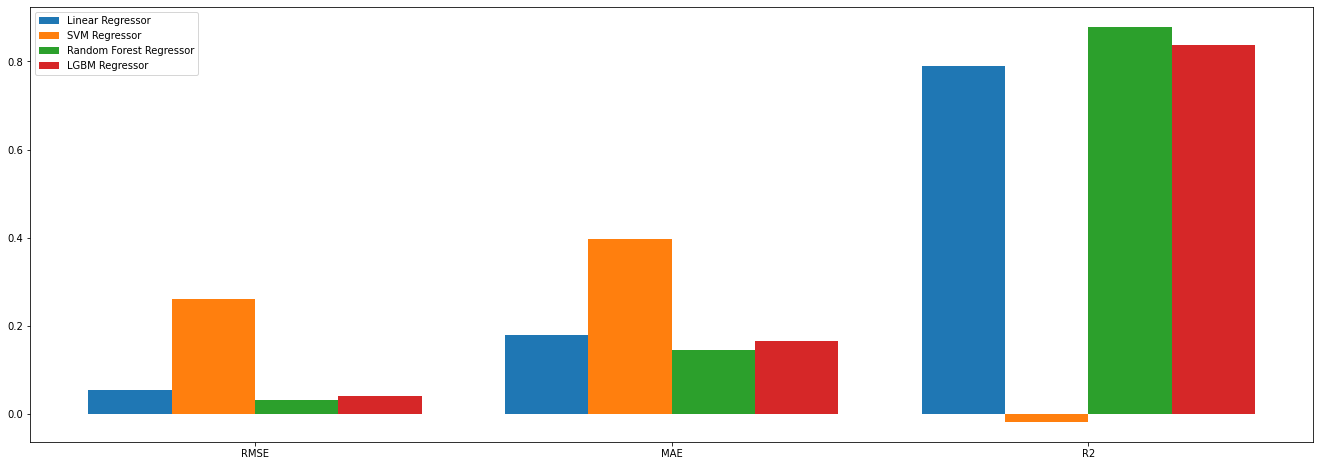

In [29]:
ev = []

print('Evaluation of Linear Regressor:')
ev.append(evaluation(y_test, y_pred_lr))
print('------------------------------------------------------')
print('Evaluation of SVM Regressor:')
ev.append(evaluation(y_test, y_pred_svm))
print('------------------------------------------------------')
print('Evaluation of Random Forest Regressor:')
ev.append(evaluation(y_test, y_pred_rf))
print('------------------------------------------------------')
print('Evaluation of LGBM Regressor:')
ev.append(evaluation(y_test, y_pred_lgbm))
print('------------------------------------------------------')


bar_width = 0.2
evs = ['RMSE', 'MAE', 'R2']
bar_x = np.array(range(3))
plt.bar(bar_x - 1.5*bar_width, ev[0], bar_width) 
plt.bar(bar_x - 0.5*bar_width, ev[1], bar_width) 
plt.bar(bar_x + 0.5*bar_width, ev[2], bar_width) 
plt.bar(bar_x + 1.5*bar_width, ev[3], bar_width) 
plt.xticks(range(3), evs)
plt.legend(labels = ['Linear Regressor', 'SVM Regressor', 'Random Forest Regressor', 'LGBM Regressor']) 
plt.show();

Based on the three metrics, the validation results are illustrated in the above figure. With an R-square of 0.88 and RMSE of 0.03, random forest outperforms the other three models on all three metrics. SVM regressor has the poorest performance since it can not tell which features play significant roles among our features. Linear regression and Light GBM both have similar performance, which is not as good as random forest. Light GBM holds a set of weak decision trees that are built to correct errors from the previous tree. Thus it is not the most suitable model since we are handling small data set with a size of 186. Linear regression is too limited and fails to address complex data sets. Therefore, we choose random forest as our model to predict IMDB ratings of episodes in The Office. 

### 3.3 Random forest regressor

Random forest is an ensemble learning method made up of a set of classifiers (e.g. decision trees). A random set of features are selected to build a decision tree. Trees are independent and uncorrelated with each other because sets of features are randomly sampled. Preditions are made by take average of preditions by each decision trees. Here are additional reasons why we choose random forest. It reduces risk of overfitting as the averaging of uncorrelated trees reduces the overall bias and variance of predictions. 


### 3.4 Tuning

The previous model with the default setting can be improved by tuning hyperparameters of random forest. By 5-fold cross-validation, the training set is split into 5 folders. One folder is used for validating and the other 4 are for training in turn. We try out the random forest with all combinations of hyperparameters in the ranges given. The combination with the highest R-square will be chosen. The grid search is implemented on two important parameters:

* n_estimators: This represents the number of decision trees built by randomly selected features. The higher number of estimators we have, the more accurate predictions the model makes. However, the large number of estimators comes with a high computational cost. 
* max_depth: This denotes the maximum number of levels in decision trees. The model tends to overfit if max_depth is larger than the optimal value. The training process is hard if max_depth is small. 

The default n_estimators is 100. Thus we may try different values below and above 100. There is no bound on the depth of decision trees by default. We choose a few possible values. 

In [30]:
scores = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring='r2')
print('The R-square score of Random forest with default parameters:')
print(np.mean(scores))

The R-square score of Random forest with default parameters:
0.7710333265877694


In [31]:
parameters = {
    'n_estimators': range(30,71,10),
    'max_depth': range(3,15,2)
    #,'max_features': range(3,15,2)
}

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)

gsearch = GridSearchCV(rf, param_grid=parameters, scoring='r2', cv=5)
gsearch.fit(X_train, y_train)
print('best parameter:{0}'.format(gsearch.best_params_))
print('cest score of model:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

best parameter:{'max_depth': 11, 'n_estimators': 40}
cest score of model:0.7776351111776739
[0.76014649 0.77121916 0.767123   0.76755134 0.76655209 0.76919977
 0.77546497 0.77060587 0.76970294 0.77147585 0.76001562 0.76971425
 0.76596563 0.76502446 0.76477148 0.76724843 0.7772158  0.77387112
 0.77368475 0.77430426 0.76729279 0.77763511 0.77407395 0.77384055
 0.7742573  0.76673374 0.77724367 0.77369367 0.77354538 0.77400075]
[{'max_depth': 3, 'n_estimators': 30}, {'max_depth': 3, 'n_estimators': 40}, {'max_depth': 3, 'n_estimators': 50}, {'max_depth': 3, 'n_estimators': 60}, {'max_depth': 3, 'n_estimators': 70}, {'max_depth': 5, 'n_estimators': 30}, {'max_depth': 5, 'n_estimators': 40}, {'max_depth': 5, 'n_estimators': 50}, {'max_depth': 5, 'n_estimators': 60}, {'max_depth': 5, 'n_estimators': 70}, {'max_depth': 7, 'n_estimators': 30}, {'max_depth': 7, 'n_estimators': 40}, {'max_depth': 7, 'n_estimators': 50}, {'max_depth': 7, 'n_estimators': 60}, {'max_depth': 7, 'n_estimators': 70}, {

The R-square of default random forest model by cross validation is roughly 0.768. The optimized model has a R-square of around 0.78 by cross validation, which is slightly higher than the model with default hyperparameters. The optimal model has 40 decision trees with a maximum depth of 9. 

### 3.5 Important features 

Feature importance of random forest is calculated based on the mean decrease in impurity ((MDI). It evaluates the importance based on the number of splits of a certain feature, proportionally to the number of samples it splits. The bar chart below shows the top 12 features that play a significant role in the model prediction. 

In [32]:
## feature importance
featureImportance = pd.DataFrame({'name': list(X.columns), 'importance': clf_rf.feature_importances_})
featureImportance = featureImportance.sort_values('importance',ascending = False)
featureImportance = featureImportance[featureImportance['importance'] > 0.005]

When the parameters maximum depth and the number of estimators are set to 5 and 40 respectively, our model achieved the highest R-square score. 

Text(0, 0.5, 'importance')

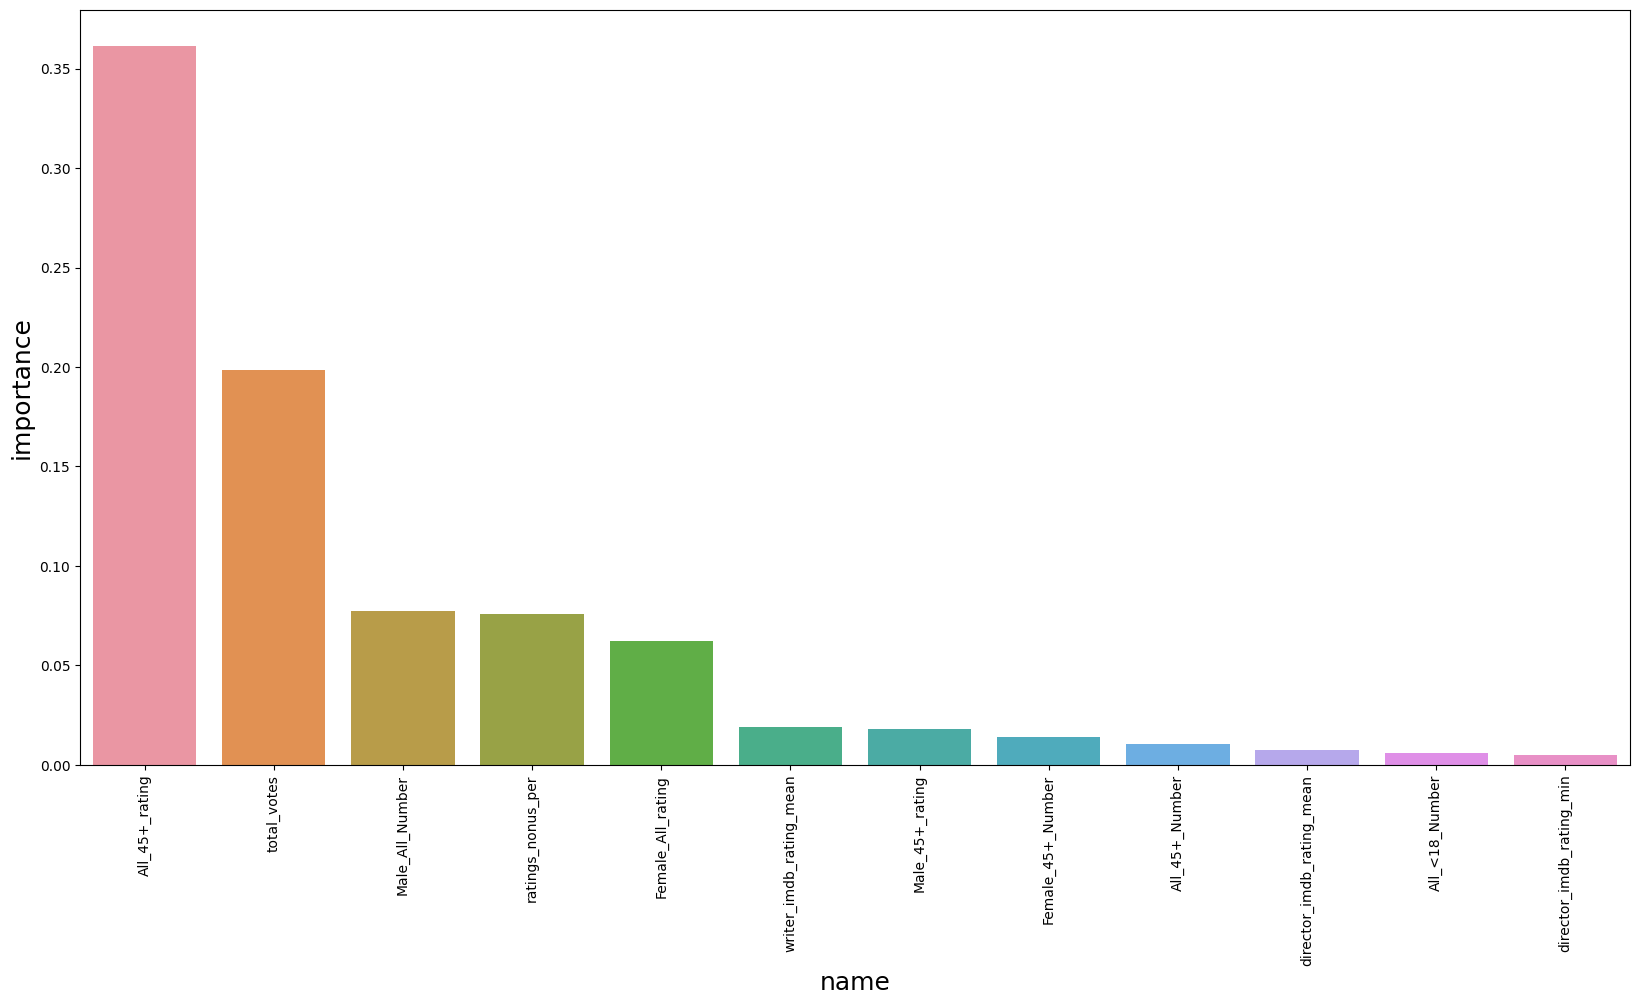

In [33]:
plt.figure(figsize=[20,10],dpi=100)
ax = sns.barplot(x = featureImportance['name'], y = featureImportance['importance'])
plt.xticks(rotation = 90)
plt.xlabel('name',fontsize=18)
plt.ylabel('importance',fontsize=18)



The strongest characteristics are reflected in how the middle-aged audience, older than forty-five to be exact, think about the episode. The total votes in the episode follow and decide how popular the episode is. The mean ratings from audiences outside the USA are also an important feature in our model. There are a few strong features related to the directors and the writers. The average rating of episodes in which the directors or the writers participated affects the quality of the episode. The minimum score of a director reflects the stability of the director's level. 

 

In addition, we visualize the importance of text feautures in our model. For a strong text feature corresponding to a combination of words, we get the TDIFD scores by reversing PCA reduction of strong text features. Here are the word cloud figures for scripts and keywords in The Office and other 
We use world cloud to show how important a word might be in a strong text feature.
 

In [34]:
xka = pd.DataFrame({'name': list(X.columns), 'importance': clf_rf.feature_importances_})
xka_tm = [list(xka['name']).index(x) for x in list(xka['name'])  if 'component' in x]
pca_importance = xka.iloc[xka_tm[0]:xka_tm[-1]+1]

In [35]:
PCA_score = []
for i in range(5):
  PCA_score.append(pd.DataFrame(np.array(pca_importance['importance'])[i*10:i*10+10] @ np.array(PCA_components_[i]),index = PCA_components_[i].columns, columns = [str(i)]))

In [36]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud
from IPython.core.display import display, HTML
def wordCloud(df, max_words=200):
  data = []
  for i,d in df.head(max_words).iterrows():
      data.append((i,str(d[str(df.columns[0])])))
  w = WordCloud()
  w.add(series_name="", data_pair=data, word_size_range=[6, 66])
  w.set_global_opts(
      title_opts=opts.TitleOpts(
          title="", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
      ),
      tooltip_opts=opts.TooltipOpts(is_show=True),
  )
  w.render("basic_wordcloud.html")
  # w.render_notebook()
  # HTML(filename="basic_wordcloud.html")

The word cloud below shows frequent script words in The Office. It suggests that the scripts including words, like 'birthday', 'award', 'chrismas', 'valentine', 'Santa',etc are more likely to a popular episode. 

In [37]:
# schrutepy_line
p1 = PCA_score[0].sort_values('0',ascending = False).head(200)
wordCloud(p1)
HTML(filename="basic_wordcloud.html")


Here is a textual analysis of each episode's storyline. The storyline that includes any of the two main characters, Erin and David, is even more appealing to the audience. The return of a character and celebrating special occasions like birthdays, Christmas, and Valentine's Day can be considered as parts of storyline in reunion episode. 

In [38]:
# storyLine
p2 = PCA_score[1].sort_values('1',ascending = False)
wordCloud(p2)
HTML(filename="basic_wordcloud.html")

The two word clouds below show some special words in the storylines and keywords of the director's other movies and TV shows might have a effect on the episode rating. It can be considered to invite a director who has produced TV shows with stories talking about women, dreams, love, angel, school, etc. 

In [39]:
# dir_story_line
p3=PCA_score[2].sort_values('2',ascending = False)
wordCloud(p3)
HTML(filename="basic_wordcloud.html")

In [40]:
# dir_keywords
p4=PCA_score[3].sort_values('3',ascending = False)
wordCloud(p4)
HTML(filename="basic_wordcloud.html")

We notice that some frequent words in cast's bioinformation are 'marry', 'usa', 'musician' and 'pilot'. These words can be used to select actors or actress if any new characters are added in the reunion episode. 

In [41]:
# cast_bio
p5=PCA_score[4].sort_values('4',ascending = False)
wordCloud(p5)
HTML(filename="basic_wordcloud.html")

## 4. Discussion & Conclusions


*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a NBC Universal executive who is with the show and  university level mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful.*

*Finally, you should include concrete recommendations on what NBC Universal should do to make their reunion episode a popular as possible.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

### 4.1 Model overview

We use the random forest as our model to predict the rating of episodes in The Office. The overall performance is improved by tuning the model and grid searching optimal hyperparameters. Our model successfully predicted a testing set with low bias and variance. 


### 4.2 Suggestions on the reunion 

Upon the random forest model, there are several recommendations on NBC Universal executive to make the reunion episode popular.


* The preferences of this population above 45 years old largely determine the success of an episode. We should use audience portraits to better understand the target population. One way to analyze the characteristics of the target audience is to collect data on how much the target audiences like an actor and actress in the TV show. In addition, we can build up realistic scenes, like when and how middle-aged audiences watch TV shows, which helps decide the air date of the union and the way of broadcasting. 


* As a TV Series filmed in the United States, The Office has a high influence in the United States. But its global reach beyond the United States should not be underestimated. The billions of people in non-US regions are a huge potential market. How to cater to the tastes of global audiences while catering to American audiences is the key to filming the union episode.

* It is suggested that the directors and writers who have joined the production of episodes with a high rating are more likely to make the union episode more successful. 